In [5]:
import pandas as pd

file_path = 'clean_FineTech_appData.csv'
data = pd.read_csv(file_path)

In [11]:
data_head = data.head()
print(data_head)
data_info = data.info()

   Unnamed: 0    user  dayofweek  hour  age  numscreens  minigame  \
0           0  235136          3     2   23          15         0   
1           1  333588          6     1   24          13         0   
2           2  254414          1    19   23           3         0   
3           3  234192          4    16   28          40         0   
4           4   51549          1    18   31          32         0   

   used_premium_feature  enrolled  liked  ...  SecurityModal  ResendToken  \
0                     0         0      0  ...              0            0   
1                     0         0      0  ...              0            0   
2                     1         0      1  ...              0            0   
3                     0         1      0  ...              0            0   
4                     0         1      1  ...              0            0   

   TransactionList  NetworkFailure  ListPicker  remain_screen_list  \
0                0               0           0      

In [12]:
# Checking value ranges (minimum and maximum) for each column to identify suitable columns for normality tests
value_ranges = data.agg([min, max]).transpose()
value_ranges


/var/folders/vm/wmkh255j12x_ylgv2g4ltlhr0000gn/T/ipykernel_21103/2972029561.py:2: FutureWarning: The provided callable <built-in function min> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  value_ranges = data.agg([min, max]).transpose()
/var/folders/vm/wmkh255j12x_ylgv2g4ltlhr0000gn/T/ipykernel_21103/2972029561.py:2: FutureWarning: The provided callable <built-in function max> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  value_ranges = data.agg([min, max]).transpose()


,min,max
Unnamed: 0,0,49999
user,13,373662
dayofweek,0,6
hour,0,23
age,16,101
numscreens,1,325
minigame,0,1
used_premium_feature,0,1
enrolled,0,1
liked,0,1


In [13]:
from scipy.stats import shapiro

# Columns to test for normality
columns_to_test = [
    'age', 'numscreens', 'remain_screen_list', 'saving_screens_count', 
    'credit_screens_count', 'cc_screens_count', 'loan_screens_count'
]

# Perform Shapiro-Wilk test on selected columns
normality_results = {}
for column in columns_to_test:
    stat, p_value = shapiro(data[column])
    normality_results[column] = {'Statistic': stat, 'p-value': p_value}

normality_results_df = pd.DataFrame(normality_results).transpose()
normality_results_df


/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,Statistic,p-value
age,0.918338,0.0
numscreens,0.867044,0.0
remain_screen_list,0.956032,0.0
saving_screens_count,0.284054,0.0
credit_screens_count,0.753180,0.0
cc_screens_count,0.315099,0.0
loan_screens_count,0.788953,0.0


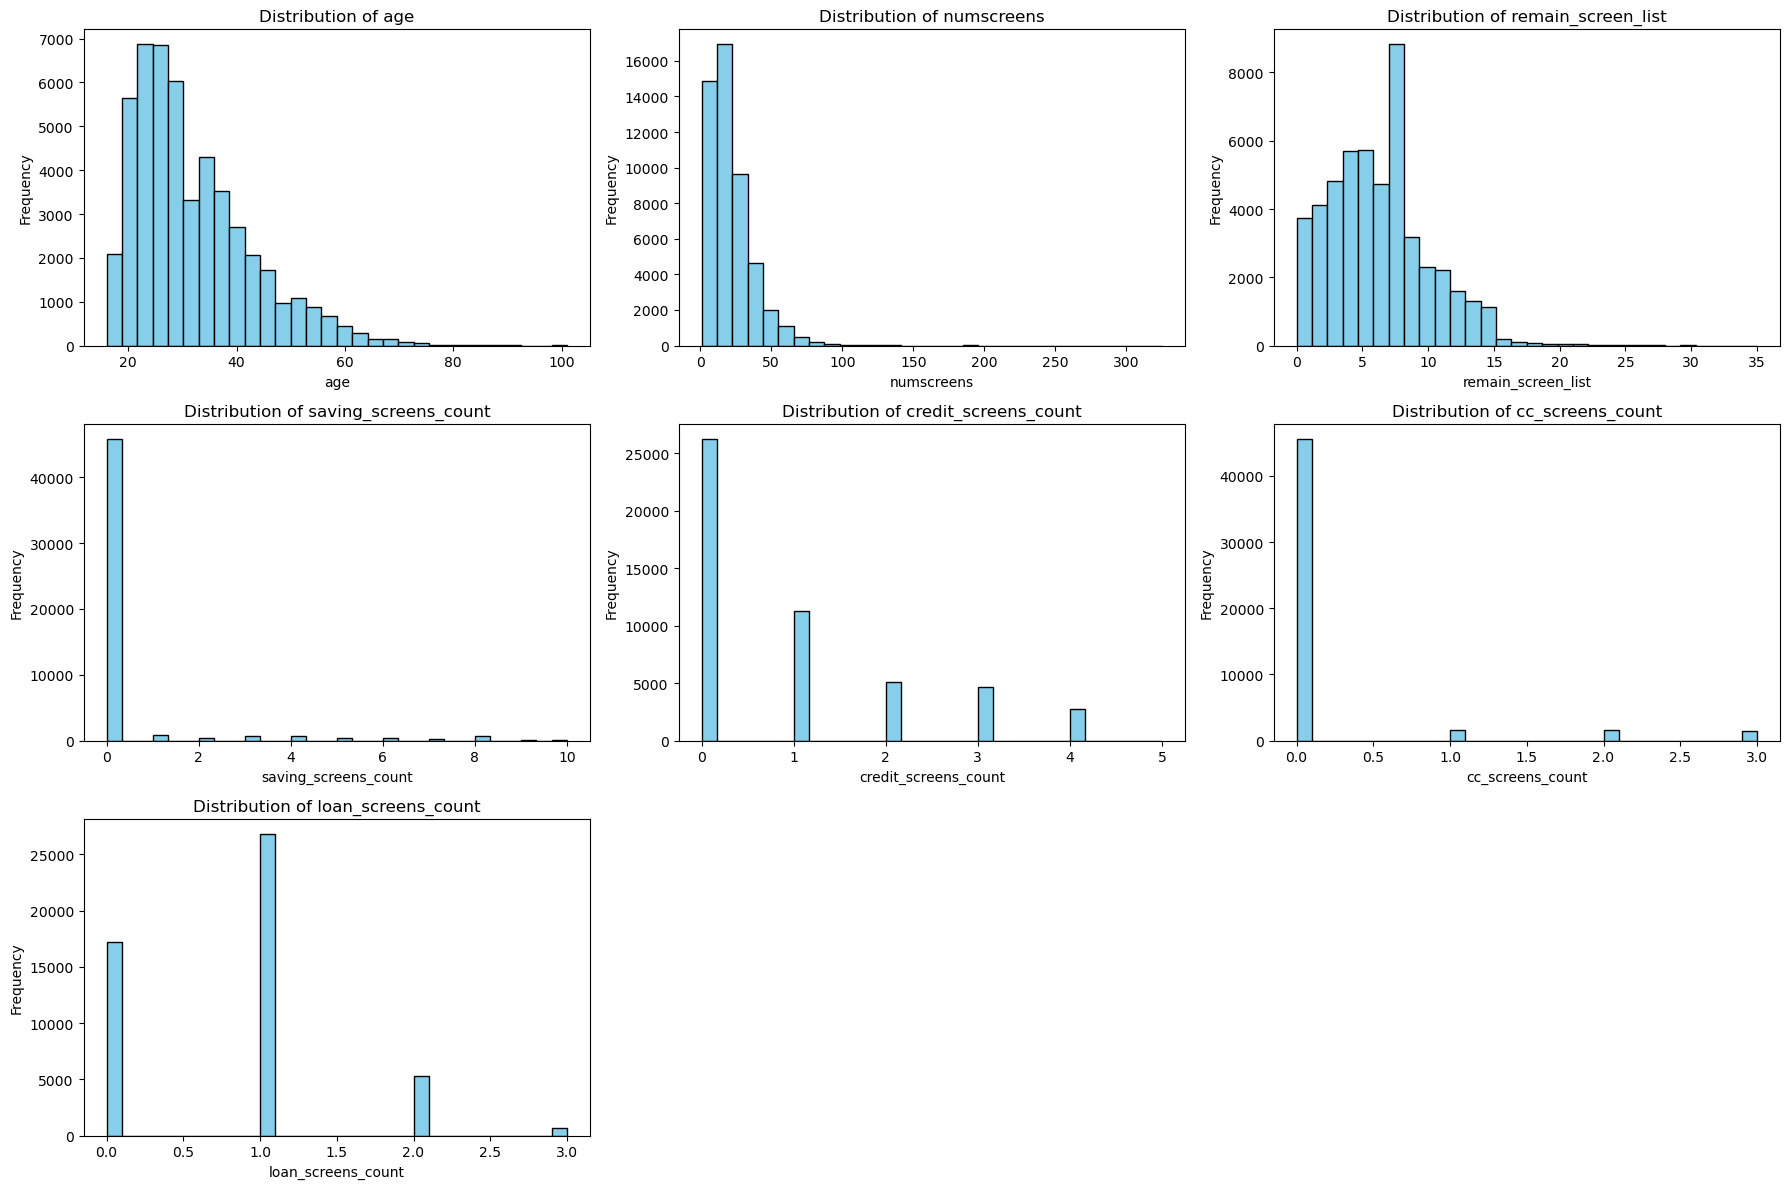

In [14]:
import matplotlib.pyplot as plt

# Set up the figure and axes for plotting histograms
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.flatten()  # Flatten the grid for easier iteration

# Plot histograms for each variable
for i, column in enumerate(columns_to_test):
    axes[i].hist(data[column], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for ax in axes[i+1:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()


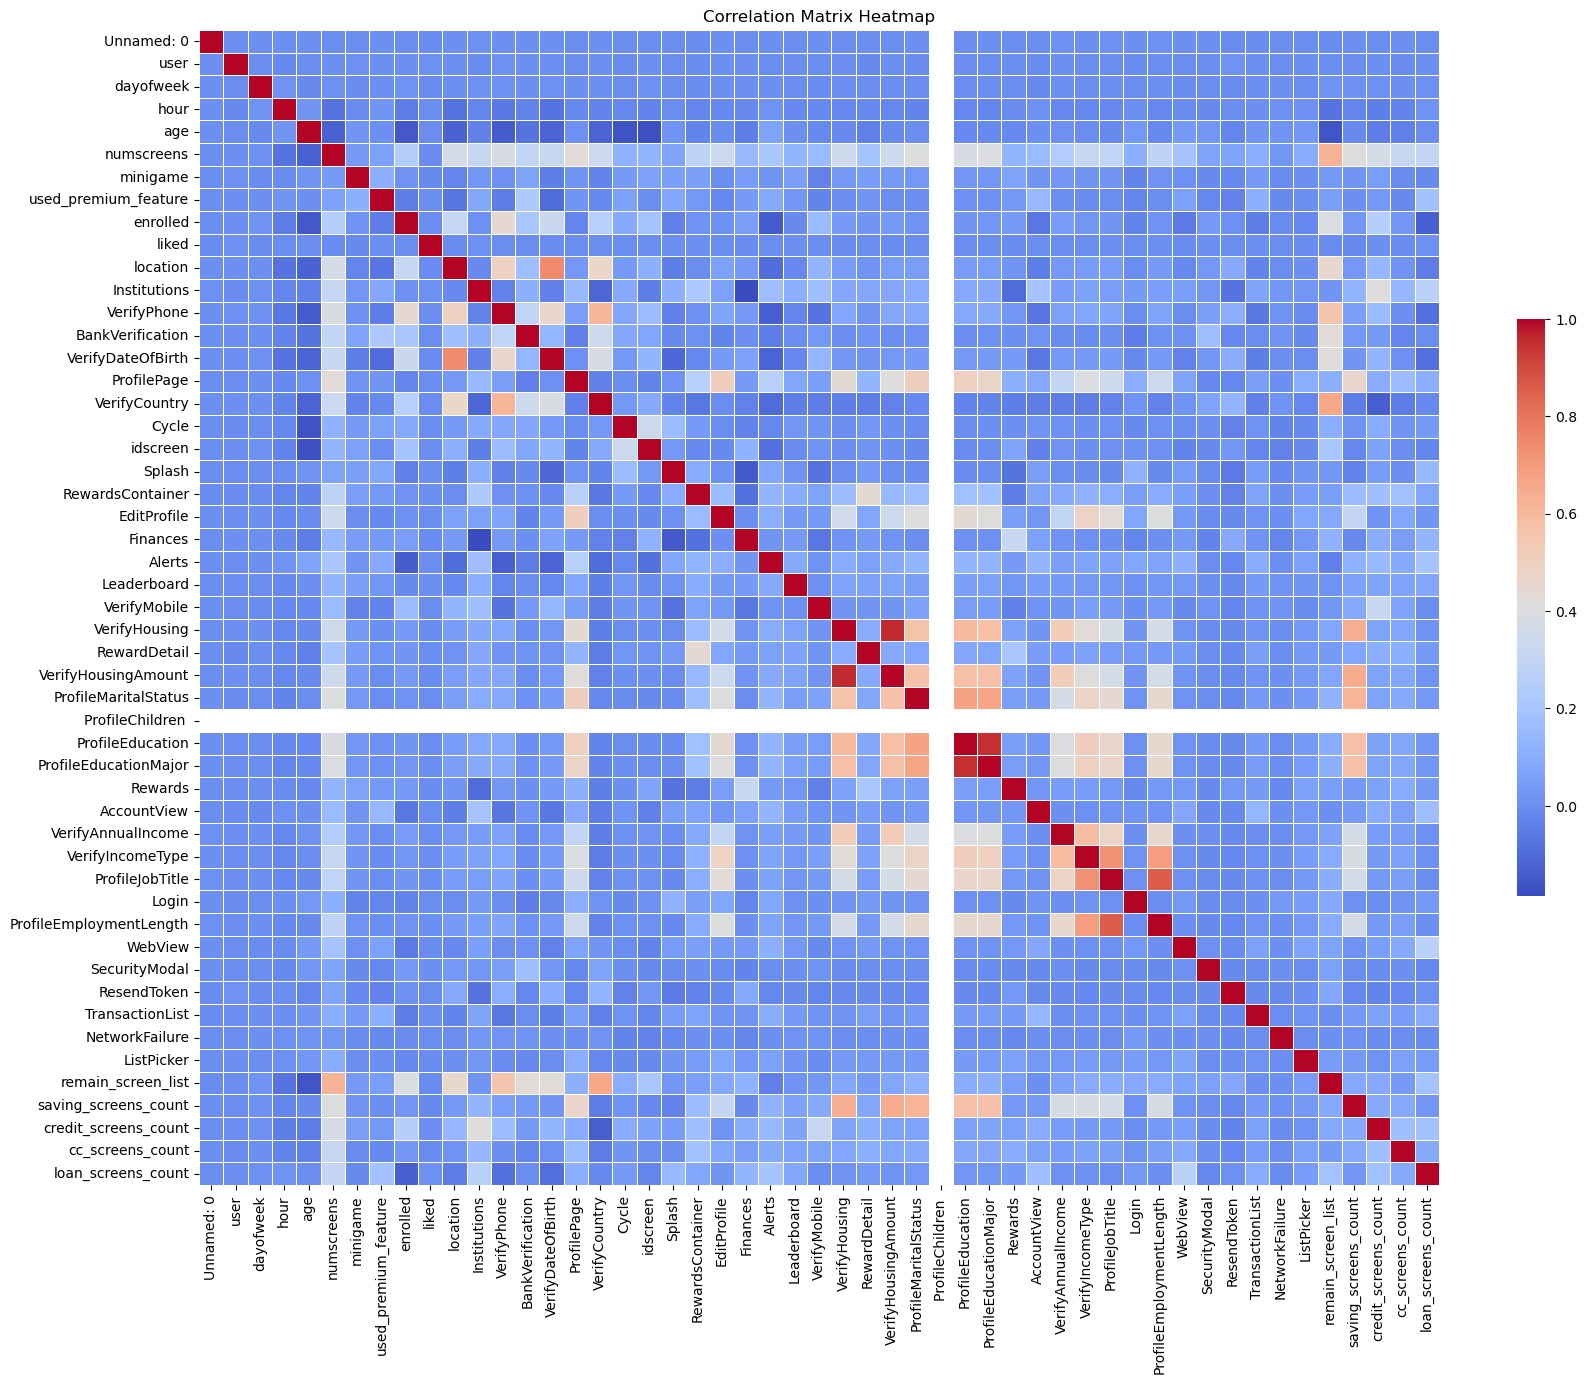

In [16]:
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".1f", linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix Heatmap')
plt.show()


In [15]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix focusing on the 'enrolled' variable
correlation_with_enrollment = correlation_matrix['enrolled'].sort_values(ascending=False)
correlation_with_enrollment


enrolled                   1.000000
VerifyPhone                0.444842
remain_screen_list         0.391810
VerifyDateOfBirth          0.325265
location                   0.305692
VerifyCountry              0.255477
credit_screens_count       0.250885
numscreens                 0.243018
BankVerification           0.210207
idscreen                   0.189781
VerifyMobile               0.153378
Cycle                      0.091339
Finances                   0.049799
VerifyAnnualIncome         0.042452
VerifyHousingAmount        0.041095
VerifyHousing              0.039477
Rewards                    0.035806
SecurityModal              0.032986
VerifyIncomeType           0.023897
ProfileEducationMajor      0.023719
cc_screens_count           0.023632
saving_screens_count       0.023345
ProfileJobTitle            0.022101
RewardDetail               0.021176
ProfileEducation           0.020025
ProfileEmploymentLength    0.016725
dayofweek                  0.014626
ProfileMaritalStatus       0

Positive Correlations:

VerifyPhone: 0.44 — Strong positive correlation, suggesting that users who verify their phone are more likely to subscribe.
remain_screen_list: 0.39 — Suggesting that higher engagement with remaining screens correlates with subscription.
VerifyDateOfBirth: 0.33 — Users verifying their date of birth seem more likely to subscribe.
location: 0.31 — Indicating that users providing location data are more likely to subscribe.
VerifyCountry: 0.26, credit_screens_count: 0.25 — Both suggest that engaging with these features increases the likelihood of subscription.
Negative Correlations:

age: -0.15 — Suggesting younger users are more likely to subscribe.
used_premium_feature: -0.048 — Curiously, users who have used a premium feature are slightly less likely to subscribe.
loan_screens_count: -0.13, Alerts: -0.14 — Higher interactions with these features correlate with lower subscription rates, which could indicate dissatisfaction or other issues.